ADITYA PUSPA RAMANINDA (5311422144)

Memasukan terlebih dahulu library yang diperlukan untuk membuat pemodelan menggunakan machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

Input data

In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Train.csv')

Melakukan Cek 5 data untuk memastikan dataset yang diinput benar

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


Melihat jumlah colom yang terdapat pada dataset dengan train.shape()

In [ ]:
train.shape

(257109, 12)

Keluaran kode tersebut,data Train memiliki 12 colom dan 257109 baris.Selanjutnya kita perlu melihat informasi pada dataset dengan train.info()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257109 entries, 0 to 257108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    257109 non-null  int64  
 1   Gender                257109 non-null  object 
 2   Age                   257109 non-null  int64  
 3   Driving_License       257109 non-null  int64  
 4   Region_Code           257109 non-null  float64
 5   Previously_Insured    257109 non-null  int64  
 6   Vehicle_Age           257109 non-null  object 
 7   Vehicle_Damage        257109 non-null  object 
 8   Annual_Premium        257108 non-null  float64
 9   Policy_Sales_Channel  257108 non-null  float64
 10  Vintage               257108 non-null  float64
 11  Response              257108 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 23.5+ MB


Hasil tersebut terdapat data yang  tidak sesuai dengan jumlah seluruh baris pada dataset,yaitu pada variabel Annual_Premium,Policy_Sales_Channel,vintage,response karena jumlah datanya tidak sesuai dengan jumlah seluruh baris pada dataset. kita dapat melakukan pengecekan jumlah data null atau kosong pada setiap variabel dengan train.isna().sum()

In [ ]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

Data tersebut, memastikan bahwa terdapat nilai null atau hilang sebanyak 1 data pada variabel “Annual_Premium”,1 data pada variabel “Policy_Sales_Channel”,1 data pada variabel “Vintage” dan  1 data pada variabel “Response”kita juga perlu mengecek apakah data duplikat atau tidak dengan duplicates_exist = train.duplicated().any()

print(duplicates_exist)

In [ ]:
duplicates_exist = train.duplicated().any()

print(duplicates_exist)

False


Karena luarannya adalah “False" disimpulkan tidak ada data duplikat pada dataset yang akan diolah.

**VISUALISASI DATA**

Visualisasi data adalah proses pembuatan grafik dari data yang tersedia agar kita bisa dengan mudah mendeteksi kejanggalan atau data yang tidak masuk akal.


In [ ]:
numeric_cols = ['Annual_Premium','Policy_Sales_Channel','Vintage','Response']

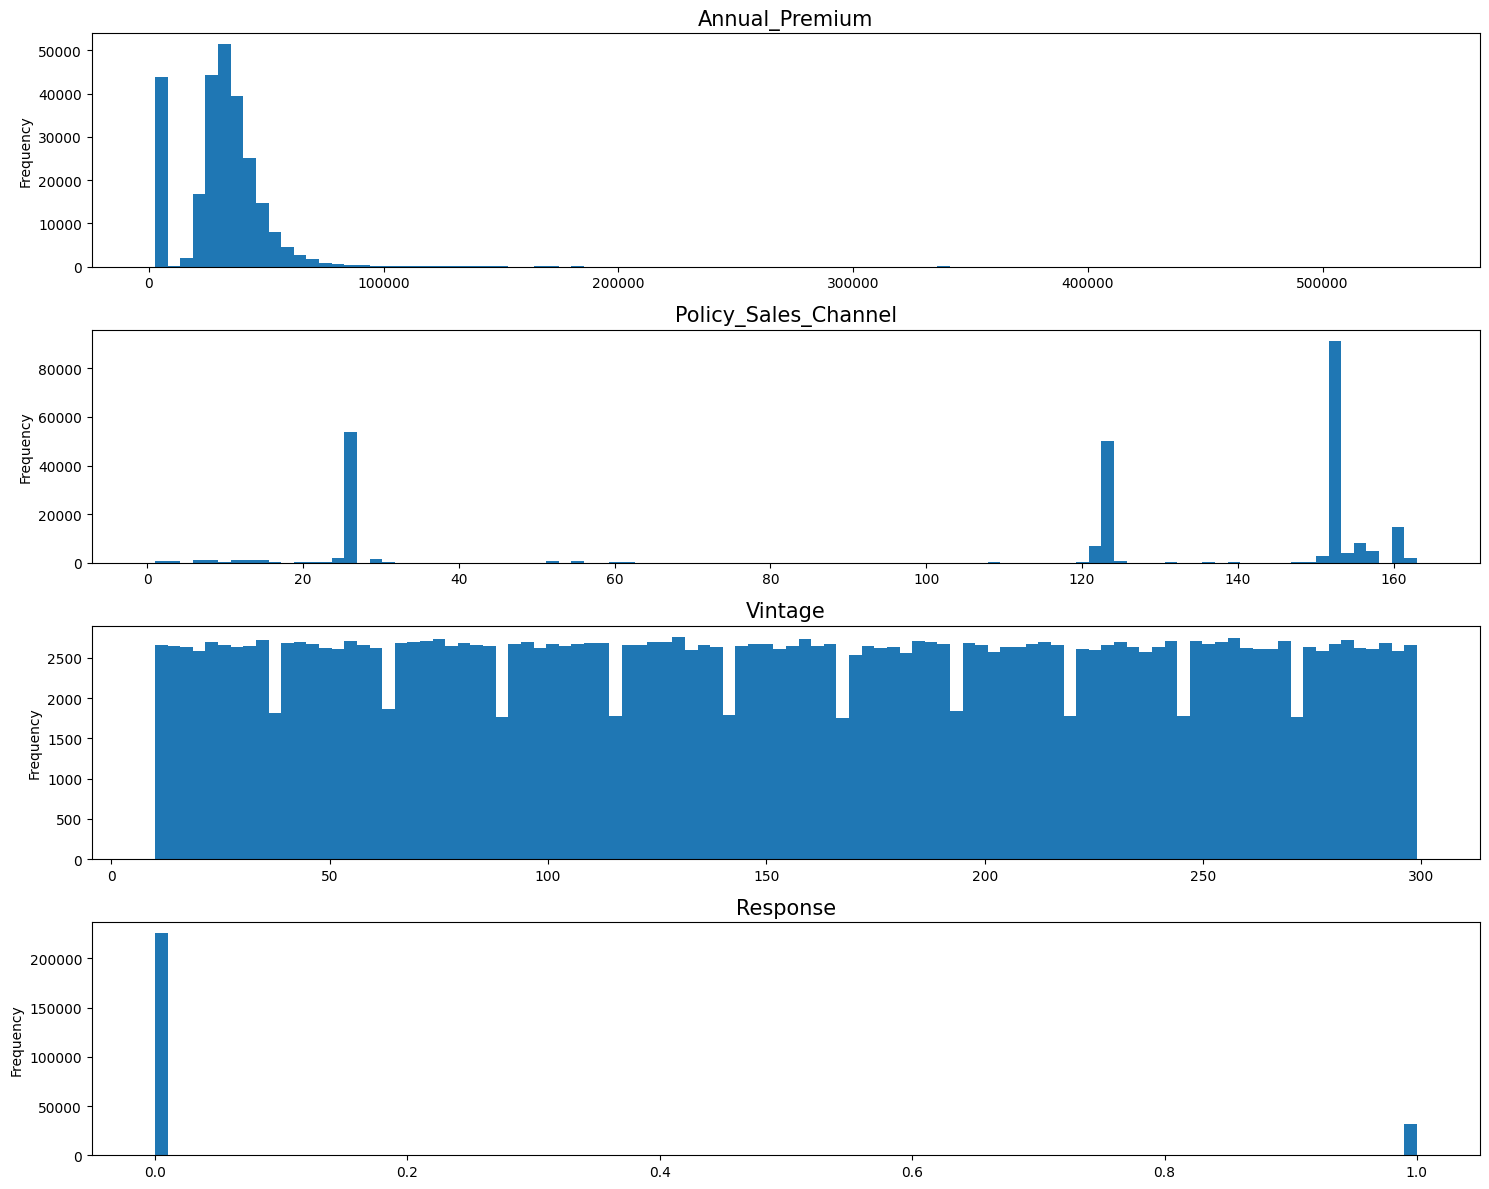

In [ ]:
f, axes = plt.subplots(4, 1, figsize=(15, 3 * 4))

for ax, col in zip(axes.flatten(), numeric_cols):
    train[col].plot(kind='hist', ax=ax, bins=100)
    ax.set_title(col, fontsize=15)

f.tight_layout()
plt.show()

Dari kode tersebut, dapat dilihat bahwa dibuat 4 grafik sekaligus dengan sumbu x adalah data variabelnya dan sumbu y adalah frekuensi data tersebut muncul pada dataset.
Jumlah premium yang harus dibayarkan pelanggan berada di antara 0 – $100.000. Hal ini merupakan hal yang normal karena biaya ini adalah biaya premium secara tahunan sehingga masih masuk akal. Selanjutnya adalah data vintage yaitu lama pelanggan telah menjadi bagian dari perusahaan. Data terletak diantara 10-300 hari dan nilai merupakan nilai yang masuk akal

Setelah itu, dilakukan juga visualisasi data dari data yang bersifat kategori yaitu data yang nilainya sudah memiliki pilihan angka. Data tersebut data dari variabel “Gender”, “Driving_License”, “Region_Code”, “Previously_Insured”, “Vehicle_Age”, “Vehicle_Damage”, dan “Policy_Sales_Channel”. Berikut adalah kode untuk melakukan hal tersebut.

In [ ]:
categorical_cols = ['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage']

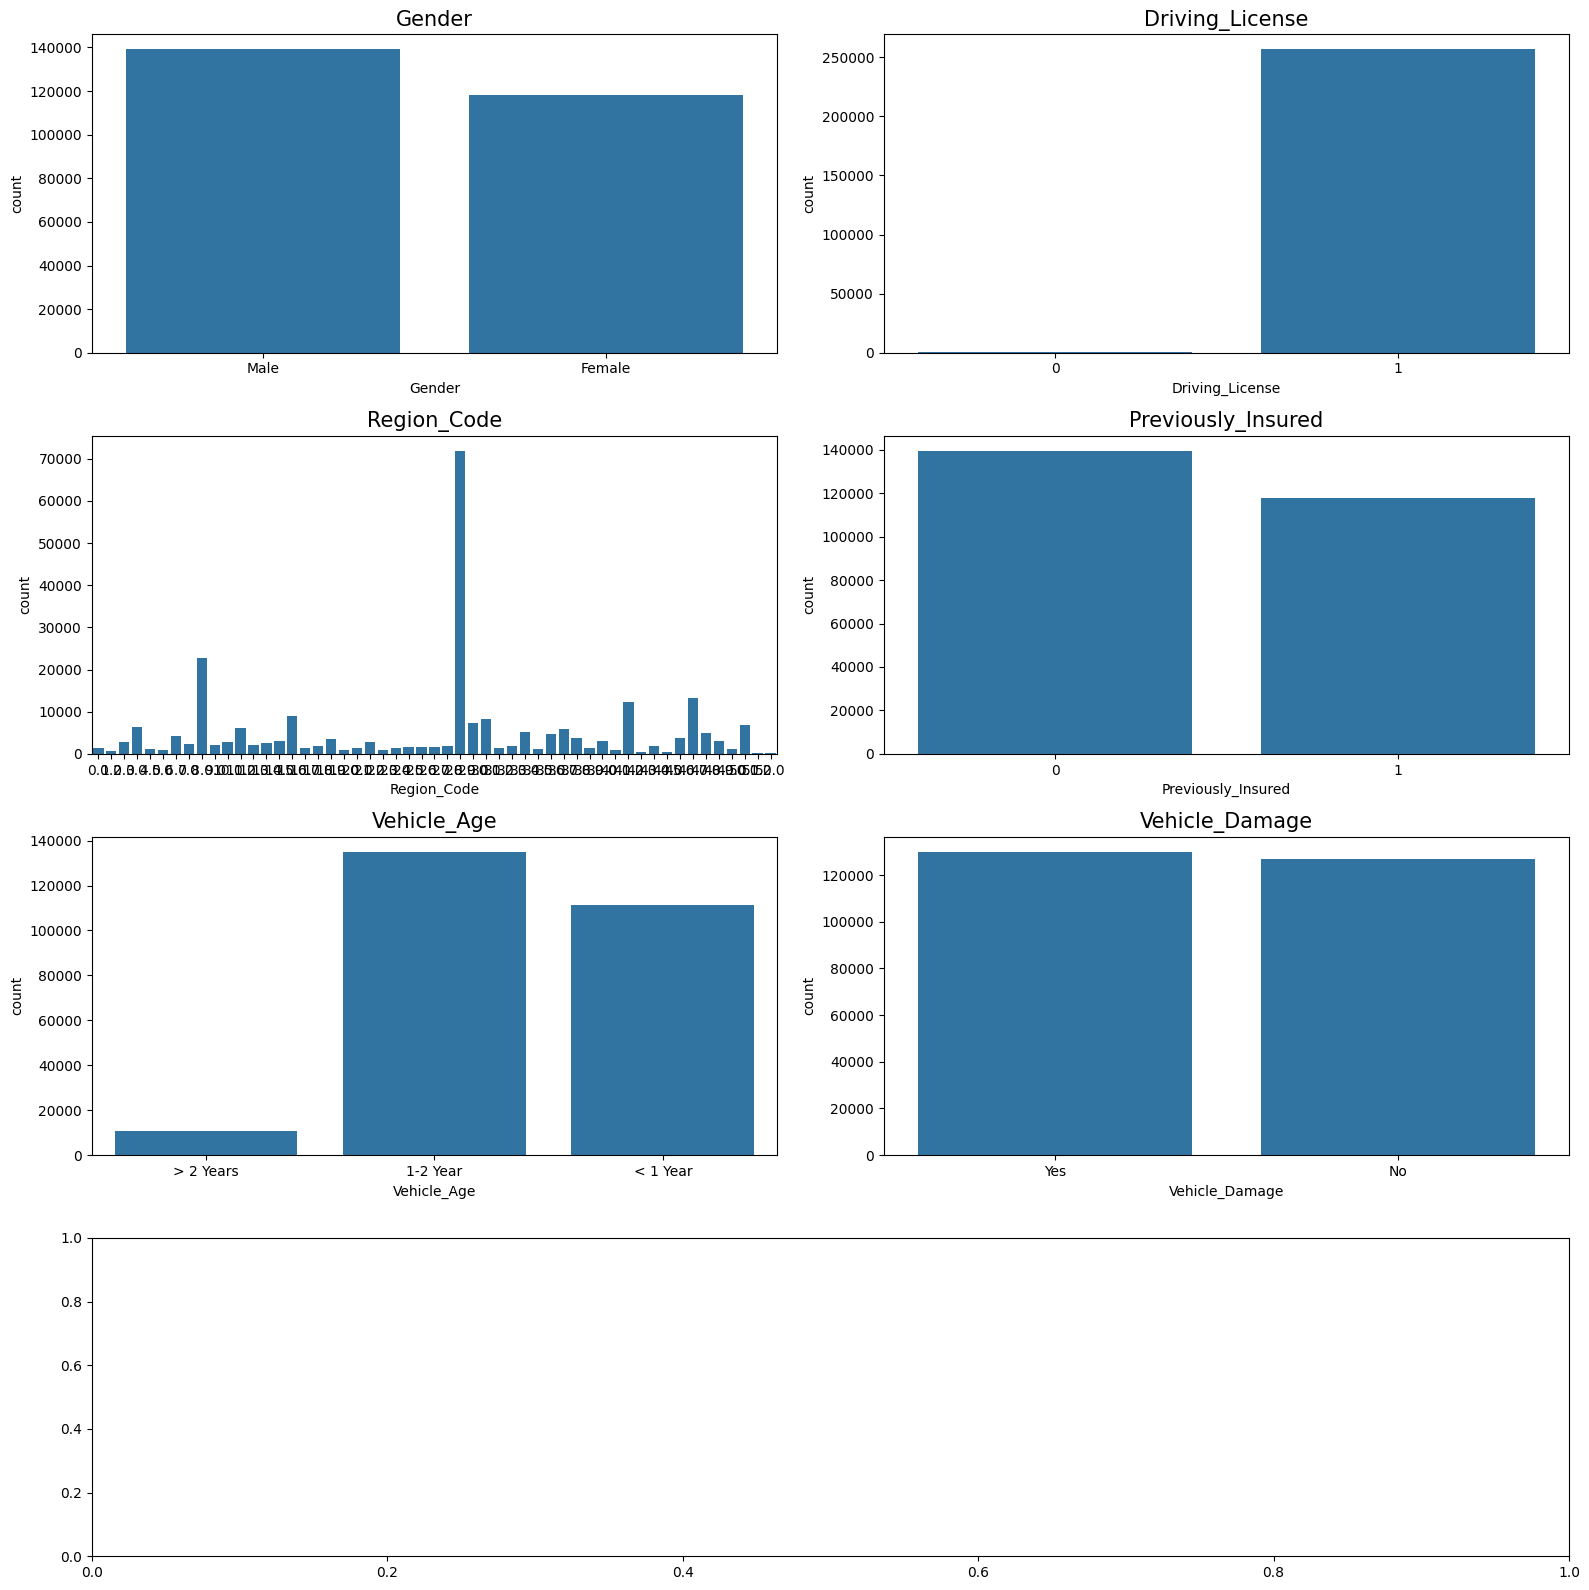

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 16))
ax7.remove()
ax8.remove()

# Membuat subplot baru di posisi yang diinginkan
ax7 = fig.add_subplot(4, 1, 4)

for ax, col in zip(fig.axes, categorical_cols):
    sns.countplot(x=train[col], ax=ax)
    ax.set_title(col, fontsize=15)

fig.tight_layout()
plt.show()

Grafik yang dihasilkan dari kode tersebut menunjukkan bahwa pada sumbu x terdapat nilai variabel dan pada sumbu y terdapat jumlah datanya. Berikut adalah hasil visualisasi tersebut satu per satu.

Dari visualisasi tersebut, terlihat bahwa pelanggan pria lebih banyak dibandingkan pelanggan wanita. Untuk variabel SIM, semua pelanggan sudah memiliki SIM. Hal ini terlihat dari data umur di mana semua pelanggan berusia di atas 20 tahun, sehingga wajar jika semua pelanggan sudah memiliki SIM.

Visualisasi data juga menunjukkan distribusi kode region dan status kepemilikan asuransi sebelumnya. Data kode region mengindikasikan bahwa pelanggan berasal dari berbagai wilayah, sehingga kode region tersebar luas di berbagai nilai. Selain itu, data menunjukkan bahwa lebih banyak pelanggan yang belum pernah memiliki asuransi sebelumnya dibandingkan yang sudah pernah memiliki.

Visualisasi data umur dan kerusakan pada kendaraan menunjukkan bahwa mayoritas pelanggan memiliki kendaraan berusia 1-2 tahun. Sedangkan untuk kerusakan, jumlah pelanggan yang sudah dan belum pernah mengalami kerusakan hampir sama.

Karena kode channel yang digunakan untuk mendapatkan informasi pelanggan adalah kode anonim, angkanya terlihat acak dan tersebar luas seperti yang terlihat pada visualisasi grafik tersebut.

**Transformasi data**

Langkah pertama yang dilakukan adalah membuat duplikat dari kedua dataset yang ada, yang akan digunakan untuk membuat pelatihan model machine learning. Hal ini merupakan hal yang penting untuk meningkatkan performa dan akurasi prediksi yang dihasilkan nantinya. Berikut adalah langkah untuk melakukannya.

In [ ]:
train_pp = train.copy()
test_pp = test.copy()

Dikarenakan nilai variabel “Driving_License” adalah 1 semua (Semua pelanggan sudah memiliki SIM) maka data variabel ini dapat dihapus agar meningkatkan efisiensi model. Hal ini dapat dilakukan dengan cara berikut.

In [ ]:
train_pp = train_pp.drop(['id', 'Driving_License'], axis=1)
test_pp = test_pp.drop(['id', 'Driving_License'], axis=1)

Data duplikat yang terdapat pada dataset train akan dihapus untuk meningkatkan efisiensi model. Hal ini dilakukan dengan train_pp = train_pp.drop_duplicates()

In [ ]:
train_pp = train_pp.drop_duplicates()

In [ ]:
if 'Annual_Premium ' in train_pp.columns:
    most_frequent_Annual_Premium  = train_pp['Annual_Premium '].mode()[0]
    train_pp['Annual_Premium '].fillna(most_frequent_Annual_Premium , inplace=True)

if 'Annual_Premium ' in test_pp.columns:
    test_pp['Annual_Premium '].fillna(most_frequent_Annual_Premium , inplace=True)

In [ ]:
if 'Annual_Premium' in train_pp.columns and 'Annual_Premium' in test_pp.columns:
    # Menghitung nilai rata-rata dari kolom 'Annual_Premium'
    mean_annual_premium = train_pp['Annual_Premium'].mean()

    # Mengimputasi nilai yang hilang di kolom 'Annual_Premium' dengan nilai rata-rata
    train_pp['Annual_Premium'] = train_pp['Annual_Premium'].fillna(mean_annual_premium)
    test_pp['Annual_Premium'] = test_pp['Annual_Premium'].fillna(mean_annual_premium)
else:
    print("Kolom 'Annual_Premium' tidak ditemukan di salah satu DataFrame.")

In [ ]:
if 'Policy_Sales_Channel' in train_pp.columns and 'Policy_Sales_Channel' in test_pp.columns:
    # Menghitung nilai rata-rata dari kolom 'Policy_Sales_Channel'
    mean_Policy_Sales_Channel = train_pp['Policy_Sales_Channel'].mean()

    # Mengimputasi nilai yang hilang di kolom 'Policy_Sales_Channel' dengan nilai rata-rata
    train_pp['Policy_Sales_Channel'] = train_pp['Policy_Sales_Channel'].fillna(mean_Policy_Sales_Channel)
    test_pp['Policy_Sales_Channel'] = test_pp['Policy_Sales_Channel'].fillna(mean_Policy_Sales_Channel)
else:
    print("Kolom 'Policy_Sales_Channel' tidak ditemukan di salah satu DataFrame.")

In [ ]:
if 'Vintage' in train_pp.columns and 'Vintage' in test_pp.columns:
    # Menghitung nilai rata-rata dari kolom 'Vintage'
    mean_Vintage = train_pp['Vintage'].mean()

    # Mengimputasi nilai yang hilang di kolom 'Vintage' dengan nilai rata-rata
    train_pp['Vintage'] = train_pp['Vintage'].fillna(mean_Vintage)
    test_pp['Vintage'] = test_pp['Vintage'].fillna(mean_Vintage)
else:
    print("Kolom 'Vintage' tidak ditemukan di salah satu DataFrame.")

In [ ]:
if 'Response' in train_pp.columns and 'Response' in test_pp.columns:
    # Menghitung nilai rata-rata dari kolom 'Response'
    mean_response = train_pp['Response'].mean()

    # Mengimputasi nilai yang hilang di kolom 'Response' dengan nilai rata-rata
    train_pp['Response'] = train_pp['Response'].fillna(mean_response)
    test_pp['Response'] = test_pp['Response'].fillna(mean_response)
else:
    print("Kolom 'Response' tidak ditemukan di salah satu DataFrame.")

Untuk memastikan tidak ada lagi data yang kosong, maka dilakukan pengecekan dengan train_pp.isna().sum()

In [ ]:
train_pp.isna().sum()

Gender                  0
Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Setelah nilainya sudah 0 semua, maka dapat dipastikan tidak ada lagi data yang kosong. Setelah melakukan hal ini, langkah selanjutnya yang perlu dilakukan adalah melakukan encoding untuk data yang bertipe objek.

In [ ]:
train_pp = pd.get_dummies(train_pp, drop_first=True)
test_pp = pd.get_dummies(test_pp, drop_first=True)

Maka akan dataset akan berubah menjadi angka semua. Sebagai contoh, variabel jenis kelamin diubah nama variabelnya yang sebelumnya bernama “Gender” menjadi “Gender_Male”. Oleh karena itu, untuk pria data ini bernilai 1 sedangkan wanita bernilai 0. Untuk lebih lengkapnya, berikut hasil encoding dari dataset yang telah dilakukan.



In [ ]:
train_pp.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,0,40454.0,26.0,217.0,1.0,True,False,True,True
1,76,3.0,0,33536.0,26.0,183.0,0.0,True,False,False,False
2,47,28.0,0,38294.0,26.0,27.0,1.0,True,False,True,True
3,21,11.0,1,28619.0,152.0,203.0,0.0,True,True,False,False
4,29,41.0,1,27496.0,152.0,39.0,0.0,False,True,False,False


**Pembuatan Model**


Model machine learning akan dibuat menggunakan Decision Tree, salah satu model yang cukup terkenal. Decision Tree adalah model supervised learning yang digunakan untuk klasifikasi dan regresi. Model ini dipilih karena kesederhanaannya dan kemudahannya untuk dipahami. Berikut adalah kode yang dibuat untuk melakukan pemodelan machine learning. Langkah pertama dalam membuat pemodelan ini adalah melakukan splitting untuk membagi dataset menjadi data untuk pelatihan (train) dan validasi (validation). Berikut adalah cara yang dilakukan:



In [ ]:
np.random.seed(69)
shuffled_indices = np.random.permutation(len(train_pp))

# Tentukan indeks untuk membagi data
test_size = 0.2
test_set_size = int(len(train_pp) * test_size)
train_indices = shuffled_indices[test_set_size:]
val_indices = shuffled_indices[:test_set_size]

# Bagi data menjadi set pelatihan dan validasi
train_x = train_pp.iloc[train_indices].drop(columns='Response')
train_y = train_pp.iloc[train_indices]['Response']
val_x = train_pp.iloc[val_indices].drop(columns='Response')
val_y = train_pp.iloc[val_indices]['Response']

print(f"Training set size: {len(train_x)}")
print(f"Validation set size: {len(val_x)}")

Training set size: 205594
Validation set size: 51398


Dari data train tersebut dilakukan pemodelan atau pelatihan machine learning dengan cara berikut.

In [ ]:
import numpy as np

# Mengacak data
np.random.seed(69)
shuffled_indices = np.random.permutation(len(train_pp))

# Tentukan indeks untuk membagi data
test_size = 0.2
test_set_size = int(len(train_pp) * test_size)
train_indices = shuffled_indices[test_set_size:]
val_indices = shuffled_indices[:test_set_size]

# Bagi data menjadi set pelatihan dan validasi
train_x = train_pp.iloc[train_indices].drop(columns='Response')
train_y = train_pp.iloc[train_indices]['Response']
test_x = train_pp.iloc[val_indices].drop(columns='Response')
test_y = train_pp.iloc[val_indices]['Response']


In [ ]:
class SimpleDecisionTree:
    def __init__(self):
        self.tree = {}

    def fit(self, X, y):
        # Membuat pohon keputusan sederhana berdasarkan median dari fitur 'Annual_Premium'
        self.tree['feature'] = 'Annual_Premium'
        self.tree['threshold'] = X['Annual_Premium'].median()
        self.tree['left'] = y[X['Annual_Premium'] <= self.tree['threshold']].mode()[0]
        self.tree['right'] = y[X['Annual_Premium'] > self.tree['threshold']].mode()[0]

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            if row[self.tree['feature']] <= self.tree['threshold']:
                predictions.append(self.tree['left'])
            else:
                predictions.append(self.tree['right'])
        return predictions

# Menggunakan SimpleDecisionTree
dt = SimpleDecisionTree()
dt.fit(train_x, train_y)
pred = dt.predict(test_x)


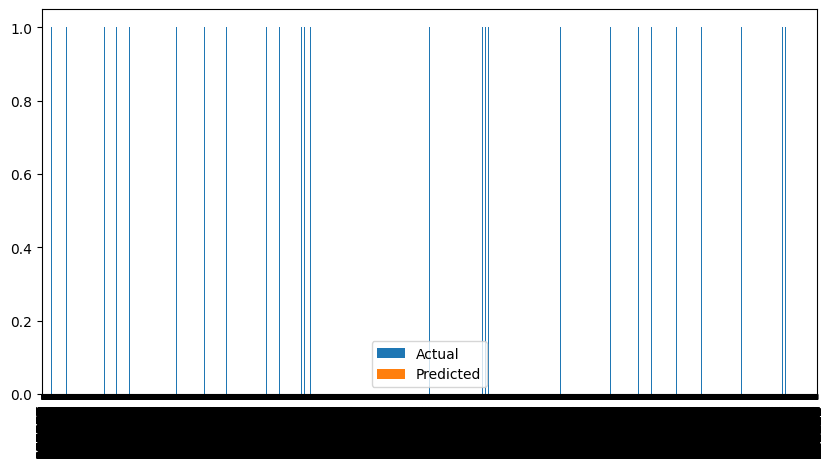

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Visualisasi prediksi
results = pd.DataFrame({'Actual': test_y, 'Predicted': pred})
results.plot(kind='bar', figsize=(10, 5))
plt.show()

In [ ]:
# Definisikan fungsi calculate_classification_metrics
def calculate_classification_metrics(actual, predicted):
    # Menghitung jumlah prediksi yang benar
    correct_predictions = sum(actual == predicted)

    # Menghitung total jumlah data
    total_samples = len(actual)

    # Menghitung akurasi
    accuracy = correct_predictions / total_samples

    # Menghitung true positive (TP), false positive (FP), true negative (TN), false negative (FN)
    TP = sum((actual == 1) & (predicted == 1))
    FP = sum((actual == 0) & (predicted == 1))
    TN = sum((actual == 0) & (predicted == 0))
    FN = sum((actual == 1) & (predicted == 0))

    # Menghitung presisi
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Menghitung recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Menghitung F1-score
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# Menghitung metrik klasifikasi
classification_metrics = calculate_classification_metrics(test_y, pred)

# Mencetak laporan klasifikasi
print("Classification report model:")
print("Accuracy:", classification_metrics['accuracy'])
print("Precision:", classification_metrics['precision'])
print("Recall:", classification_metrics['recall'])
print("F1-score:", classification_metrics['f1_score'])

Classification report model:
Accuracy: 0.8749756799875481
Precision: 0
Recall: 0
F1-score: 0


Dapat dilihat bahwa akurasi dari prediksi yang dibuat berada diangka sekitar 87,5%